In [ ]:
# magic
%matplotlib inline

# imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# from IPython.display import SVG, display # svg images
import graphviz as gv
import random as rand
from math import *

# my libraries
from mcr import *

# make figures large enough
from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)

In [2]:
# Create an empty square
square = mcr()

In [3]:
# Add a couple of shapes to the square
shape1 = Polygon([(0.2,0.2), (0.2, 0.7), (0.7,0.7), (0.7,0.2)])
shape2 = Polygon([(0.5,0.15), (1.0,0.15), (.75, .87)])

square.add_obstacle(shape1)
square.add_obstacle(shape2)

# Add a start and goal
square.start = (0.05, 0.05)
square.goal  = (0.95, 0.95)

0: 0.24999999999999994
1: 0.18


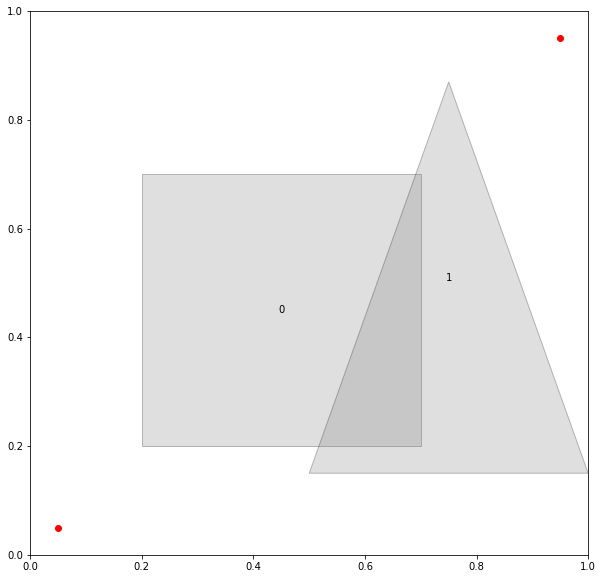

In [4]:
square.show_bare_obstacles()

0: 0.2020833333333333
0,1: 0.04791666666666663
1: 0.13208333333333336


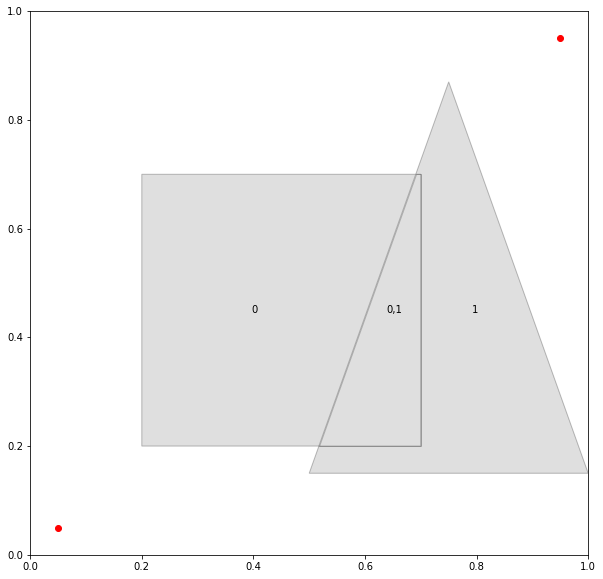

In [5]:
# Display the MCR
square.show_obstacles()

In [6]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

In [7]:
type(square.obstacles[1])

shapely.geometry.polygon.Polygon

(0.0, 1.0, 0.0, 1.0)

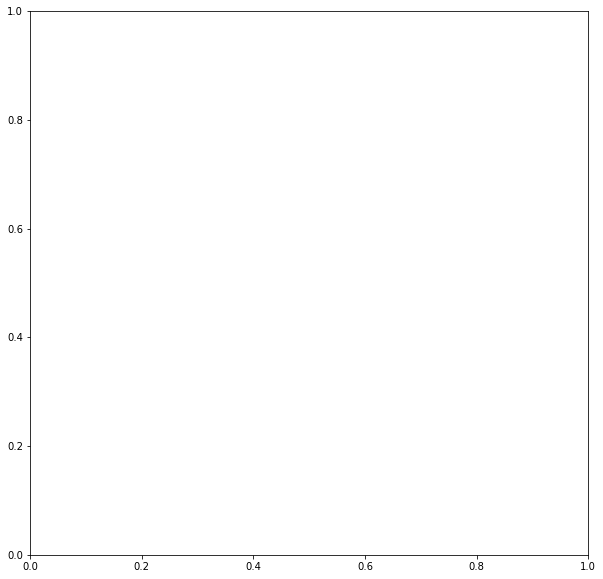

In [8]:
plt.axis()

In [9]:
svg_square = mcr(svg='path/to/missing.svg')

File path/to/missing.svg not found
Couldn't load all shapes in  path/to/missing.svg


ValueError: 

In [10]:
straws = mcr(svg='straws.svg')

0,10: 0.0050821283559873125
1,10: 0.005082128355987313
2,10: 0.005082128355987311
3,10: 0.005082128355987311
4,10: 0.005082128355987311
5,10: 0.005082128355987311
6,10: 0.005082128355987311
7,10: 0.005082128355987303
8,10: 0.005082128355987303
9,10: 0.005081774027858186
10: 0.0022740779327007285
10: 0.0022744322608298524
10: 0.0022740779327007276
10: 0.0022744322608298567
10: 0.0022740779327007276
10: 0.0022740779327007276
10: 0.0022744322608298606
10: 0.0022740779327007354
10: 0.0022744322608298606
0: 0.002274077932700728
0,11: 0.0050821283559873125
1: 0.0022740779327007285
1,11: 0.005082128355987313
2: 0.0022740779327007276
2,11: 0.005082128355987311
3: 0.0022740779327007276
3,11: 0.005082128355987311
4: 0.0022740779327007276
4,11: 0.005082128355987311
5: 0.0022740779327007276
5,11: 0.005082128355987311
6: 0.0022740779327007276
6,11: 0.005082128355987311
7: 0.002274077932700724
7,11: 0.005082128355987303
8: 0.002274077932700724
8,11: 0.005082128355987303
9,11: 0.005081774027858186
11

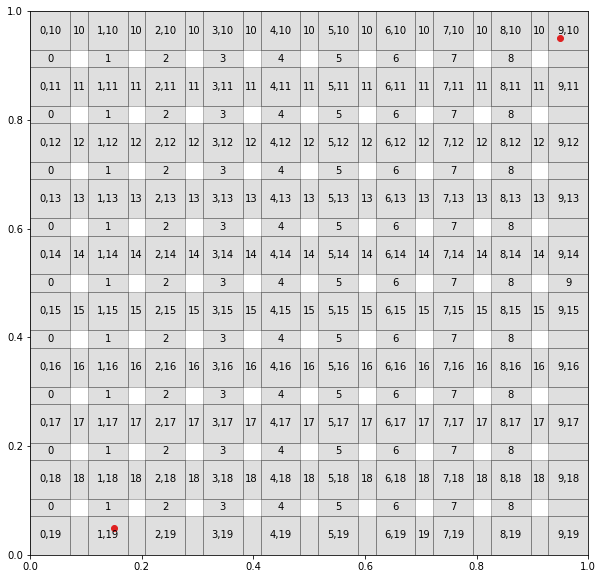

In [11]:
straws.show_obstacles()

In [12]:
nine = list(filter(lambda x:x.label == '9', straws.overlapped_obstacles))[0]

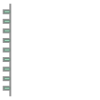

In [13]:
nine

In [14]:
straws2 = mcr(svg='straws2.svg')

In [15]:
nineteen = list(filter(lambda x:x.label == '19', straws2.overlapped_obstacles))[0]

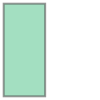

In [16]:
nineteen

In [ ]:
straws.show_bare_obstacles()

In [ ]:
straws.obstacles

In [ ]:
shapes = MCR(svg='shapes.svg')

In [ ]:
shapes.show_obstacles()

In [ ]:
shapes.obstacles

In [ ]:
for s in shapes.obstacles:
    print(s.exterior)

In [ ]:
f = random_mcr(20)
f.show_obstacles()

In [ ]:
r = f.obstacles[15] - f.obstacles[7]

In [ ]:
type(r)

In [ ]:
for p in r:
    print(p)

In [ ]:
rotations = MCR(svg='rotation.svg')
rotations.show_obstacles()

In [ ]:
MCR

In [ ]:
__debug__